In [29]:
#importing the data

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

df = pd.read_csv(r"C:\anaconda\New folder (2)\Company_Data.csv")
df

df.describe()
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [30]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
df['Sales'] = pd.cut(x=df['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
df['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

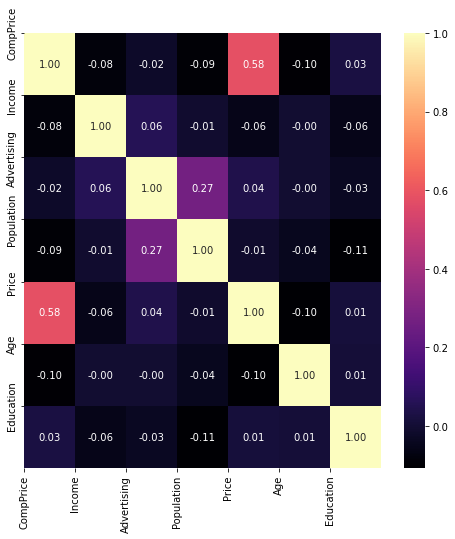

In [31]:
#visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Check Correlation amoung parameters
corr = df.corr()
fig, ax = plt.subplots(figsize=(8,8))


# Generate a heatmap
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns)

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()


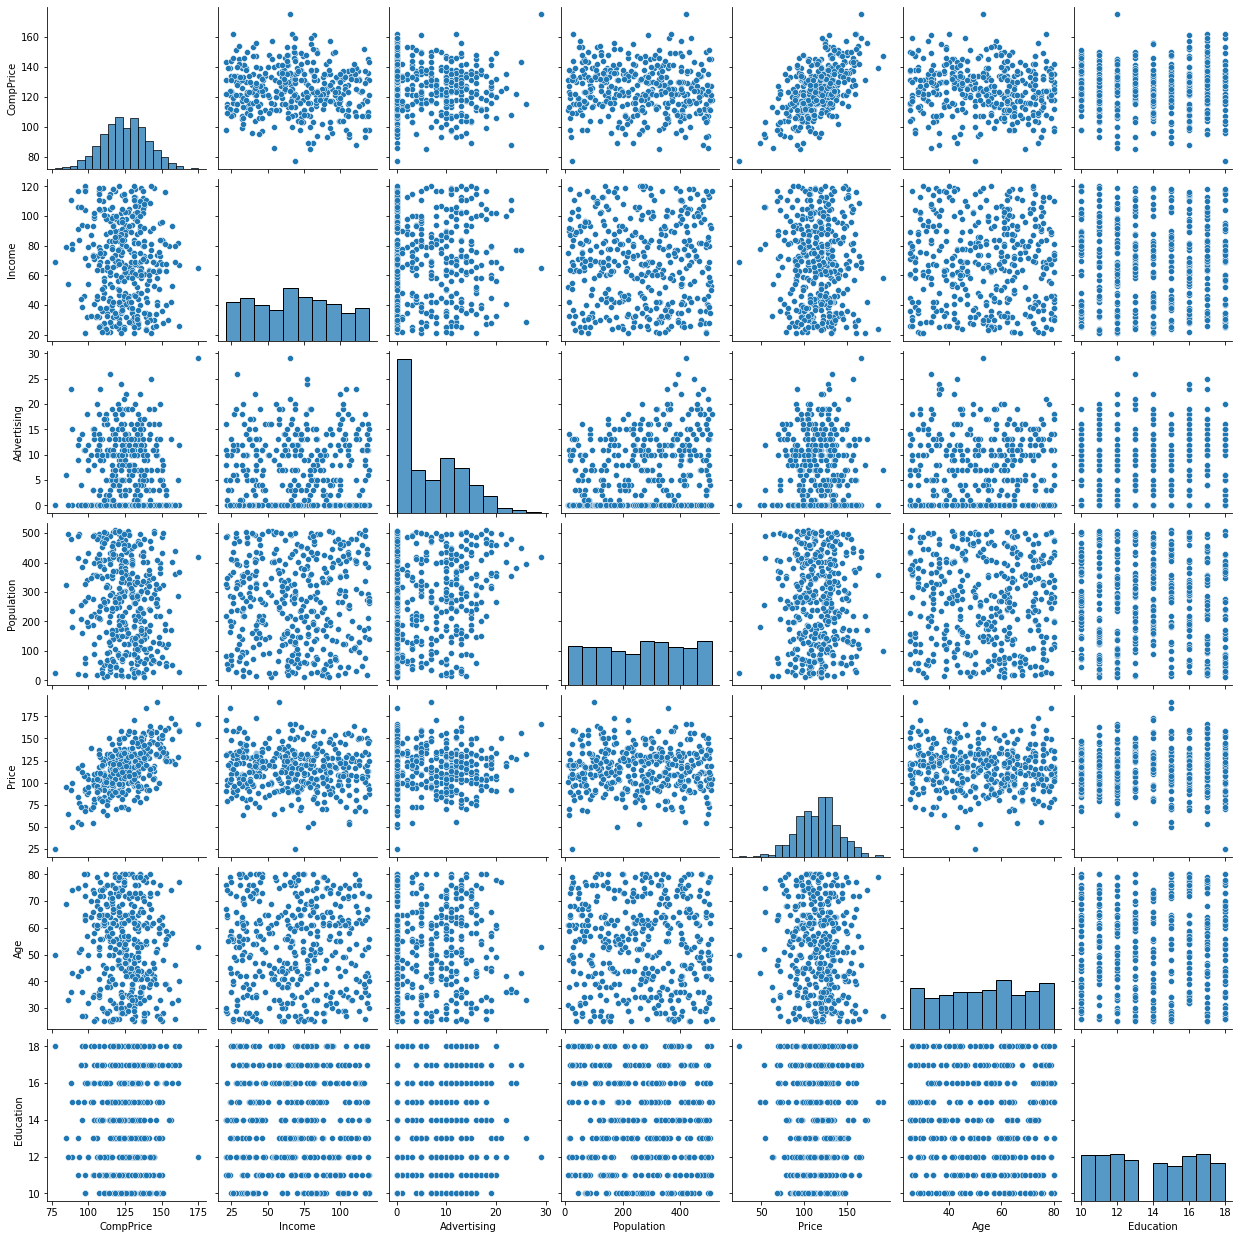

In [32]:
#pairwise plot of all the features
sns.pairplot(df)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


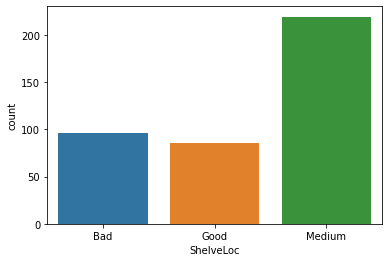

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


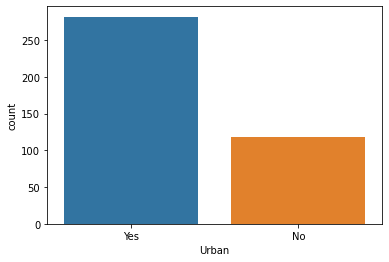

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


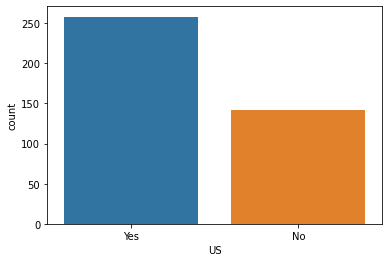

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


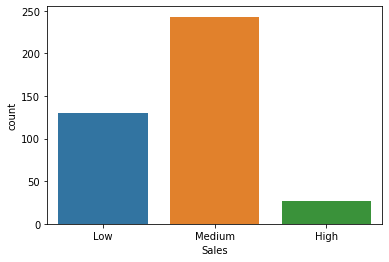

In [33]:
# checking count of categories for categorical columns colums
sns.countplot(df['ShelveLoc'])
plt.show()

sns.countplot(df['Urban'])
plt.show()

sns.countplot(df['US'])
plt.show()

sns.countplot(df['Sales'])
plt.show()


In [34]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
LE =LabelEncoder()
df.iloc[:,6] = LE.fit_transform(df.iloc[:,6])
df.iloc[:,9] = LE.fit_transform(df.iloc[:,9])
df.iloc[:,10] = LE.fit_transform(df.iloc[:,10])
df.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,0,42,17,1,1
1,Medium,111,48,16,260,83,1,65,10,1,1
2,Medium,113,35,10,269,80,2,59,12,1,1
3,Medium,117,100,4,466,97,2,55,14,1,1
4,Low,141,64,3,340,128,0,38,13,1,0


In [36]:
#splitting the data into x and y
x = df.drop('Sales',axis=1)
y = df["Sales"]

In [37]:
#Data Partition
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=(40))


In [50]:
#Random forest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
kfold=KFold()

num_trees = 100
max_features = 'auto'
skfolds=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)


In [51]:
# Train the model on training data
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred_test)
print("test score:",ac.round(2))

test score: 0.72


In [53]:
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.7157931516422082


In [59]:
#Bagging
from sklearn.ensemble import BaggingClassifier

skfolds=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cart = DecisionTreeClassifier()
num_trees = 100
bag = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=42)


In [60]:
# Train the model on training data
bag.fit(x_train, y_train)
y_pred_test = bag.predict(x_test)

In [61]:
ac = accuracy_score(y_test,y_pred_test)
print("test score:",ac.round(2))

test score: 0.74


In [68]:
results = cross_val_score(bag, x_train, y_train, cv=kfold)
print(results.mean())

0.7422082459818309


In [63]:
#Ada boost
from sklearn.ensemble import AdaBoostClassifier

skfolds=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
ada = AdaBoostClassifier(n_estimators=10, random_state=42)

In [64]:
ada.fit(x_train, y_train)
y_pred_test = ada.predict(x_test)

In [65]:
ac = accuracy_score(y_test,y_pred_test)
print("test score:",ac.round(2))

test score: 0.65


In [67]:
results = cross_val_score(ada, x_train, y_train, cv=kfold)
print(results.mean())

0.626345213137666
